In [1]:
import multiprocessing as mp
import os
from pathlib import Path

import huggingface_hub
import rasterio
from matplotlib import pyplot as plt
from rich import print

Matplotlib created a temporary cache directory at /tmp/matplotlib-7v1jw_dj because the default path (/afs/inf.ed.ac.uk/user/a/aantoni2/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


(5467, 8143)

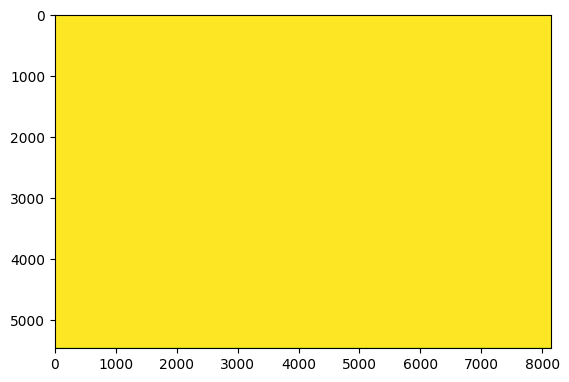

(5467, 8143)

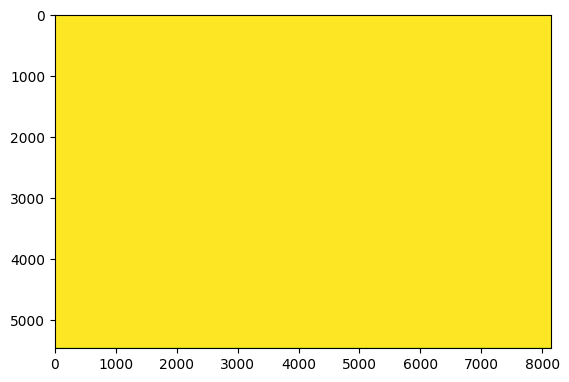

(5467, 8143)

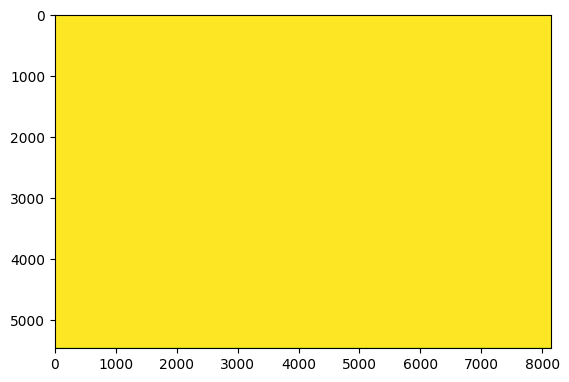

(5467, 8143)

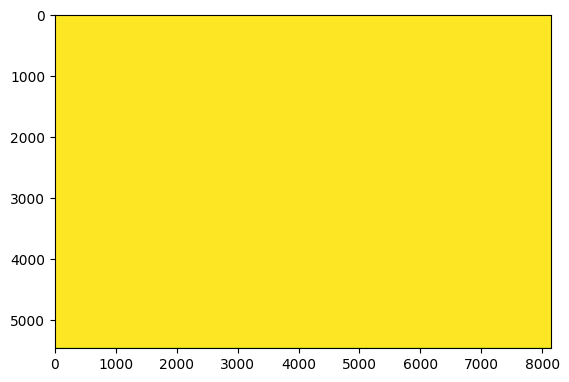

(5467, 8143)

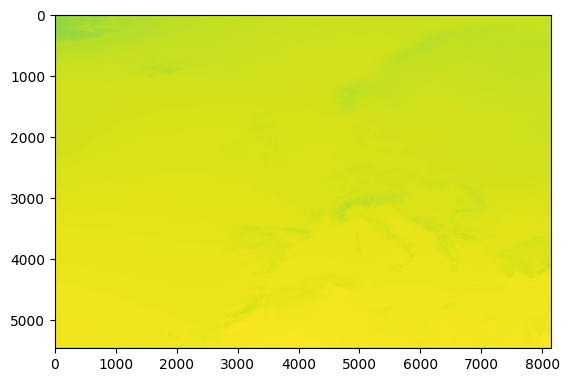

In [15]:
import numpy as np

import numpy as np
from scipy import stats

import numpy as np


def normalize_and_gaussian(array):
    """
    Normalize a numpy array to the range [0, 255], apply Gaussian normalization,
    and then normalize again to the range [0, 255].

    Args:
    array (np.array): Input numpy array to be normalized.

    Returns:
    np.array: Normalized and Gaussian normalized numpy array.
    """
    # Normalize to [0, 255]
    array = np.array(array, dtype=np.float32)
    array -= np.min(array)
    array /= np.max(array)
    array *= 255

    # Gaussian normalization
    array = (array - np.mean(array)) / np.std(array)

    # Normalize to [0, 255] again
    array -= np.min(array)
    array /= np.max(array)
    array *= 255

    return array.astype(np.uint8)


def visualize_tiff(file_path):
    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the raster data
        img = src.read(1)
    print(img.shape)
    # print(f"mean: {img.mean()}, min: {img.min()}, max: {img.max()}, std: {img.std()}")
    # img = normalize_and_gaussian(img)
    # print(f"mean: {img.mean()}, min: {img.min()}, max: {img.max()}, std: {img.std()}")
    # Display the raster data
    plt.imshow(img)
    plt.show()


#  Climatic_Monthly_2000-2019/01_2000_pr.tif
#  Climatic_Monthly_2000-2019/01_2000_tas.tif
#  Climatic_Monthly_2000-2019/01_2000_tasmax.tif
#  Climatic_Monthly_2000-2019/01_2000_tasmin.tif
# BioClimatic_Average_1981-2010/bio1.tif"


root_path = Path("/disk/scratch_fast1/data/GeoLifeCLEF2023/climate/Climate/")
filepaths = [
    "Climatic_Monthly_2000-2019/01_2000_pr.tif",
    "Climatic_Monthly_2000-2019/01_2000_tas.tif",
    "Climatic_Monthly_2000-2019/01_2000_tasmax.tif",
    "Climatic_Monthly_2000-2019/01_2000_tasmin.tif",
    "BioClimatic_Average_1981-2010/bio1.tif",
]

for filepath in filepaths:
    visualize_tiff(file_path=root_path / filepath)